# Network analysis


In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle
import csv

In [2]:
## PANDA output paths
lumA_panda_path = "/Users/ursulawidocki/Desktop/BreCaNet/Data/PANDAoutput/output_panda_lumA.txt"
lumB_panda_path = "/Users/ursulawidocki/Desktop/BreCaNet/Data/PANDAoutput/output_panda_lumB.txt"
basal_panda_path = "/Users/ursulawidocki/Desktop/BreCaNet/Data/PANDAoutput/output_panda_basal.txt"
her2_panda_path = "/Users/ursulawidocki/Desktop/BreCaNet/Data/PANDAoutput/output_panda_her2.txt"
norm_panda_path = "/Users/ursulawidocki/Desktop/BreCaNet/Data/PANDAoutput/output_panda_norm.txt"

In [3]:
## Makes the network objects

# Luminal A network
G_lumA_df = pd.read_csv(lumA_panda_path, delimiter = " ", names = ["TF", "gene", "prior", "weight"])
G_lumA = nx.from_pandas_edgelist(G_lumA_df[["TF", "gene", "weight"]], 'TF', 'gene', ['weight'])

# Luminal B network
G_lumB_df = pd.read_csv(lumB_panda_path, delimiter = " ", names = ["TF", "gene", "prior", "weight"])
G_lumB = nx.from_pandas_edgelist(G_lumB_df[["TF", "gene", "weight"]], 'TF', 'gene', ['weight'])

# Basal network
G_basal_df = pd.read_csv(basal_panda_path, delimiter = " ", names = ["TF", "gene", "prior", "weight"])
G_basal = nx.from_pandas_edgelist(G_basal_df[["TF", "gene", "weight"]], 'TF', 'gene', ['weight'])

# HER2 network
G_her2_df = pd.read_csv(her2_panda_path, delimiter = " ", names = ["TF", "gene", "prior", "weight"])
G_her2 = nx.from_pandas_edgelist(G_her2_df[["TF", "gene", "weight"]], 'TF', 'gene', ['weight'])

# Normal network
G_norm_df = pd.read_csv(norm_panda_path, delimiter = " ", names = ["TF", "gene", "prior", "weight"])
G_norm = nx.from_pandas_edgelist(G_norm_df[["TF", "gene", "weight"]], 'TF', 'gene', ['weight'])

In [4]:
## Size of each network

num_lumA_nodes = len(G_lumA.nodes())
print("LumA Nodes: ", num_lumA_nodes)
num_lumA_edges = len(G_lumA.edges())
print("Edges: ", num_lumA_edges)

num_lumB_nodes = len(G_lumB.nodes())
print("Lum B Nodes: ", num_lumB_nodes)
num_lumB_edges = len(G_lumB.edges())
print("Edges: ", num_lumB_edges)

num_basal_nodes = len(G_basal.nodes())
print("Basal Nodes: ", num_basal_nodes)
num_basal_edges = len(G_basal.edges())
print("Edges: ", num_basal_edges)

num_her2_nodes = len(G_her2.nodes())
print("HER2 Nodes: ", num_her2_nodes)
num_her2_edges = len(G_her2.edges())
print("Edges: ", num_her2_edges)

num_norm_nodes = len(G_norm.nodes())
print("Normal Nodes: ", num_norm_nodes)
num_norm_edges = len(G_norm.edges())
print("Edges: ", num_norm_edges)

LumA Nodes:  29495
Edges:  18580044
Lum B Nodes:  29480
Edges:  18570384
Basal Nodes:  29401
Edges:  18519508
HER2 Nodes:  29075
Edges:  18309564
Normal Nodes:  28922
Edges:  18211032


In [5]:
# How many genes and TFs are in each network?
print(len(set(G_lumA_df["TF"])))
print(len(set(G_lumA_df["gene"])))

print(len(set(G_lumB_df["TF"])))
print(len(set(G_lumB_df["gene"])))

print(len(set(G_basal_df["TF"])))
print(len(set(G_basal_df["gene"])))

print(len(set(G_her2_df["TF"])))
print(len(set(G_her2_df["gene"])))

print(len(set(G_norm_df["TF"])))
print(len(set(G_norm_df["gene"])))

source_lumA = list(set(G_lumA_df["TF"]))
odd_source = list()
for item in source_lumA:
    if item[0:4] == "ENSG":
        odd_source.append(item)
        
print(set(odd_source))

target_lumA = list(set(G_lumA_df["gene"]))
odd_target = list()
for item in target_lumA:
    if item[0:4] != "ENSG":
        odd_target.append(item)
        
print(set(odd_target))

print(set(G_lumA_df["TF"]) == set(G_lumB_df["TF"]) == set(G_basal_df["TF"]) == set(G_her2_df["TF"]) == set(G_norm_df["TF"]))

644
28851
644
28836
644
28757
644
28431
644
28278
set()
set()
True


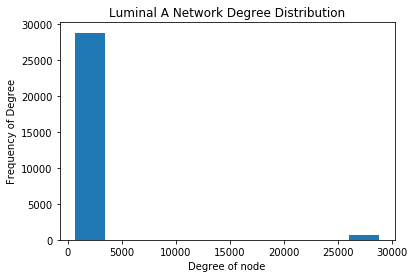

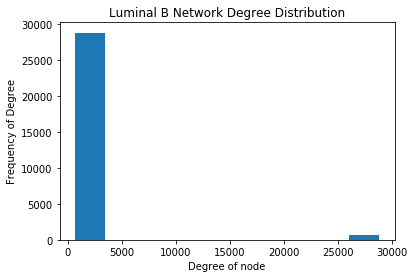

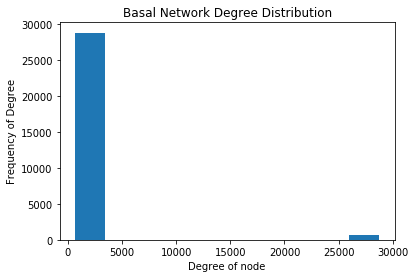

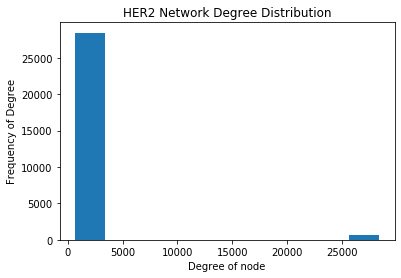

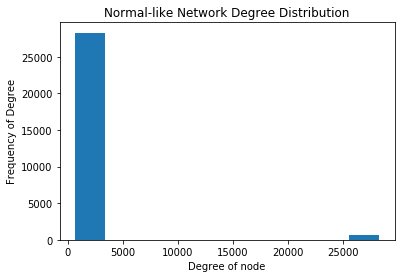

In [6]:
## Degree distributions

# Luminal A
plt.figure()
plt.hist(dict(G_lumA.degree()).values())
plt.xlabel("Degree of node")
plt.ylabel("Frequency of Degree")
plt.title("Luminal A Network Degree Distribution")
plt.show()

# Luminal B
plt.figure()
plt.hist(dict(G_lumB.degree()).values())
plt.xlabel("Degree of node")
plt.ylabel("Frequency of Degree")
plt.title("Luminal B Network Degree Distribution")
plt.show()

# Basal
plt.figure()
plt.hist(dict(G_basal.degree()).values())
plt.xlabel("Degree of node")
plt.ylabel("Frequency of Degree")
plt.title("Basal Network Degree Distribution")
plt.show()

# HER2
plt.figure()
plt.hist(dict(G_her2.degree()).values())
plt.xlabel("Degree of node")
plt.ylabel("Frequency of Degree")
plt.title("HER2 Network Degree Distribution")
plt.show()

# Normal
plt.figure()
plt.hist(dict(G_norm.degree()).values())
plt.xlabel("Degree of node")
plt.ylabel("Frequency of Degree")
plt.title("Normal-like Network Degree Distribution")
plt.show()

In [9]:
G_her2.get_edge_data()

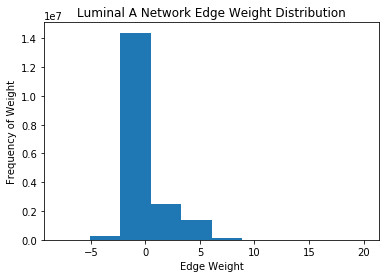

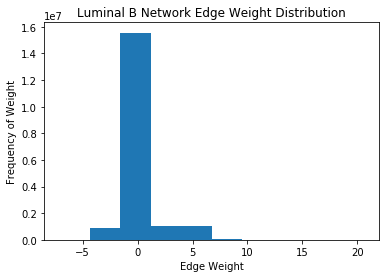

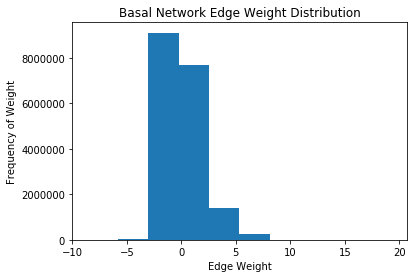

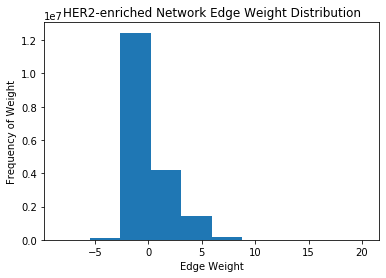

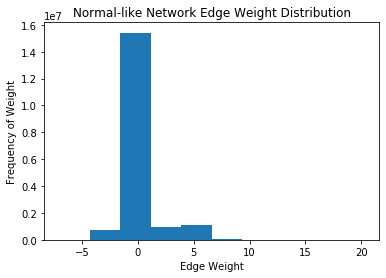

In [8]:
# distribution of edge weights

# Luminal A
plt.figure()
plt.hist(G_lumA_df["weight"])
plt.xlabel("Edge Weight")
plt.ylabel("Frequency of Weight")
plt.title("Luminal A Network Edge Weight Distribution")
plt.show()

# Luminal B
plt.figure()
plt.hist(G_lumB_df["weight"])
plt.xlabel("Edge Weight")
plt.ylabel("Frequency of Weight")
plt.title("Luminal B Network Edge Weight Distribution")
plt.show()


# Basal-like
plt.figure()
plt.hist(G_basal_df["weight"])
plt.xlabel("Edge Weight")
plt.ylabel("Frequency of Weight")
plt.title("Basal Network Edge Weight Distribution")
plt.show()

# HER2
plt.figure()
plt.hist(G_her2_df["weight"])
plt.xlabel("Edge Weight")
plt.ylabel("Frequency of Weight")
plt.title("HER2-enriched Network Edge Weight Distribution")
plt.show()

# Normal-like
plt.figure()
plt.hist(G_norm_df["weight"])
plt.xlabel("Edge Weight")
plt.ylabel("Frequency of Weight")
plt.title("Normal-like Network Edge Weight Distribution")
plt.show()

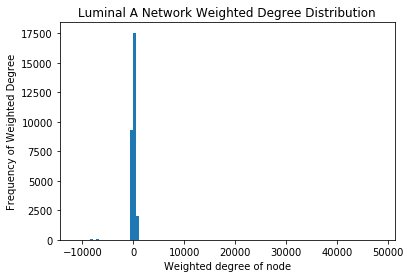

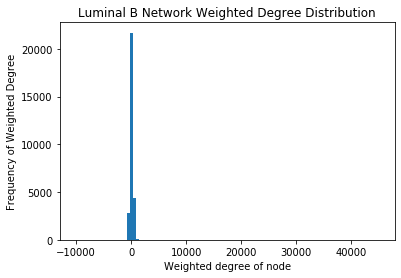

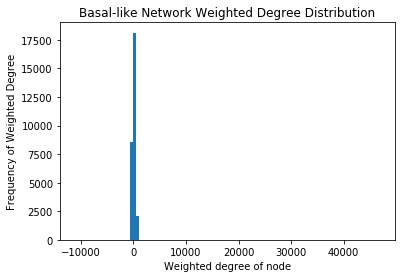

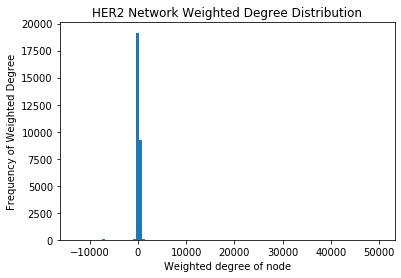

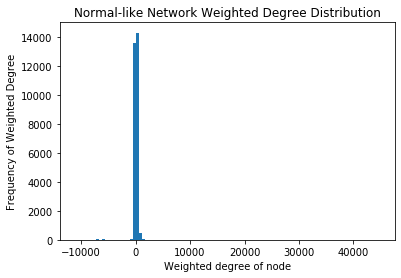

In [12]:
## Weighted Degree Distribution

# Luminal A
plt.figure()
plt.hist(dict(G_lumA.degree(weight = "weight")).values(), bins= 100)
plt.xlabel("Weighted degree of node")
plt.ylabel("Frequency of Weighted Degree")
plt.title("Luminal A Network Weighted Degree Distribution")
plt.show()

# Luminal B
plt.figure()
plt.hist(dict(G_lumB.degree(weight = "weight")).values(), bins= 100)
plt.xlabel("Weighted degree of node")
plt.ylabel("Frequency of Weighted Degree")
plt.title("Luminal B Network Weighted Degree Distribution")
plt.show()

# Basal
plt.figure()
plt.hist(dict(G_basal.degree(weight = "weight")).values(), bins= 100)
plt.xlabel("Weighted degree of node")
plt.ylabel("Frequency of Weighted Degree")
plt.title("Basal-like Network Weighted Degree Distribution")
plt.show()

#Her2
plt.figure()
plt.hist(dict(G_her2.degree(weight = "weight")).values(), bins= 100)
plt.xlabel("Weighted degree of node")
plt.ylabel("Frequency of Weighted Degree")
plt.title("HER2 Network Weighted Degree Distribution")
plt.show()

# Normal-like
plt.figure()
plt.hist(dict(G_norm.degree(weight = "weight")).values(), bins= 100)
plt.xlabel("Weighted degree of node")
plt.ylabel("Frequency of Weighted Degree")
plt.title("Normal-like Network Weighted Degree Distribution")
plt.show()

In [16]:
# Density of each network

dens_lumA = num_lumA_edges / ((num_lumA_nodes*(num_lumA_nodes-1))/2)
dens_lumB = num_lumB_edges / ((num_lumB_nodes*(num_lumB_nodes-1))/2)
dens_basal = num_basal_edges / ((num_basal_nodes*(num_basal_nodes-1))/2)
dens_her2 = num_her2_edges / ((num_her2_nodes*(num_her2_nodes-1))/2)
dens_norm = num_norm_edges / ((num_norm_nodes*(num_norm_nodes-1))/2)

print("Density of LumA: ", dens_lumA)
print("Density of LumB: ", dens_lumB)
print("Density of Basal: ", dens_basal)
print("Density of HER2: ", dens_her2)
print("Density of Norm: ", dens_norm)

Density of LumA:  0.04271640125333487
Density of LumB:  0.04273765152508584
Density of Basal:  0.04284991926092569
Density of HER2:  0.04331950534382246
Density of Norm:  0.04354345904188237


In [ ]:
## Which genes are in Luminal A but not in the others
# not in Luminal B

# not in Basal

# not in HER2

# not in Normal-like

In [5]:
edge_list_lumA = list(G_lumA.edges())
TF_list = list()
for link in range(0,len(edge_list_lumA)):
    (TF,gene) = edge_list_lumA[link]
    TF_list.append(TF)
    if TF[0:4] == "ENSG":
        #print(gene)
        n=0

# ENSG00000242268 is the only ENSG TF detected

In [14]:
# prints node of degree greaters than 25000
#print(dict(G_lumA.degree()).values())
lumA_dict = dict(G_lumA.degree())
high_degree = list()
for item in lumA_dict:
    if lumA_dict[item] > 25000:
        high_degree.append(item)
print(len(high_degree))

644


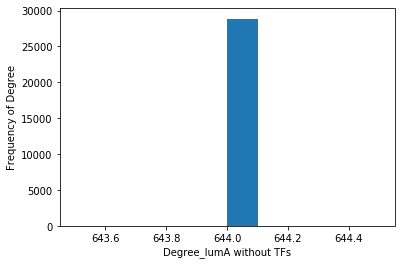

In [16]:
# create dictionary with those high-degree nodes to see distribution of genes
lumA_dict2 = {}
for item in lumA_dict:
    if lumA_dict[item] < 25000:
        lumA_dict2[item] = lumA_dict[item]
        
plt.figure()
plt.hist(lumA_dict2.values())
plt.xlabel("Degree_lumA without TFs")
plt.ylabel("Frequency of Degree")
plt.show()

In [42]:
## Gets genes of weight greater than |2|

# RORC is the most DE TF in LumA
subset = G_lumA_df.loc[(G_lumA_df['TF'] == "RORC") & (abs(G_lumA_df['weight']) >= 2)]
#subset["gene"].to_csv("LumA_RORC_genes.txt", sep = "\t")

RORC_genes = list(subset["gene"])

with open("LumA_RORC_genes.txt","w") as f:
    wr = csv.writer(f,delimiter="\n")
    for ele in RORC_genes:
        wr.writerow([ele])
        
# RELB is the most DE TF in LumB
subset = G_lumB_df.loc[(G_lumB_df['TF'] == "RELB") & (abs(G_lumB_df['weight']) >= 2)]
#subset["gene"].to_csv("LumA_RORC_genes.txt", sep = "\t")

RELB_genes = list(subset["gene"])

with open("LumB_RELB_genes.txt","w") as f:
    wr = csv.writer(f,delimiter="\n")
    for ele in RELB_genes:
        wr.writerow([ele])
        
# PRDM1 is the most DE TF in Basal
subset = G_basal_df.loc[(G_basal_df['TF'] == "PRDM1") & (abs(G_basal_df['weight']) >= 2)]
#subset["gene"].to_csv("LumA_RORC_genes.txt", sep = "\t")

PRDM1_genes = list(subset["gene"])

with open("Basal_PRDM1_genes.txt","w") as f:
    wr = csv.writer(f,delimiter="\n")
    for ele in PRDM1_genes:
        wr.writerow([ele])
        
# GFI1B is the most DE TF in HER2
subset = G_her2_df.loc[(G_her2_df['TF'] == "GFI1B") & (abs(G_her2_df['weight']) >= 2)]
#subset["gene"].to_csv("LumA_RORC_genes.txt", sep = "\t")

GFI1B_genes = list(subset["gene"])

with open("HER2_GFI1B_genes.txt","w") as f:
    wr = csv.writer(f,delimiter="\n")
    for ele in GFI1B_genes:
        wr.writerow([ele])
        
# NEUROD1 is the most DE TF in normal-like
subset = G_norm_df.loc[(G_norm_df['TF'] == "NEUROD1") & (abs(G_norm_df['weight']) >= 2)]
#subset["gene"].to_csv("LumA_RORC_genes.txt", sep = "\t")

NEUROD1_genes = list(subset["gene"])

with open("Norm_NEUROD1_genes.txt","w") as f:
    wr = csv.writer(f,delimiter="\n")
    for ele in NEUROD1_genes:
        wr.writerow([ele])

In [ ]:
###########################################################################################

In [43]:
print(len(RORC_genes))
print(len(RELB_genes))
print(len(PRDM1_genes))
print(len(GFI1B_genes))
print(len(NEUROD1_genes))

2092
1978
5614
2617
1924


## Looking at DE gene subgraphs

### ENSG00000261662	

RP5-1042I8.7

In [21]:
## calc mean PANDA z-score about SARAF
gene = 'ENSG00000261662'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda)

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda)

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda)

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda)

# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda)


-31.727088080107308
6.175857442973922
103.31897853379493
34.28140194372197
-105.32192026558486


### ENSG00000258926

RP11-47I22.1

In [22]:
## calc PANDA sums of 
gene = 'ENSG00000258926'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda)

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda)

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda)

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda)

# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda)



-24.77448297024878
46.54526433964085
-25.572190173573752
21.413603150067914
-306.4565530443714


### ENSG00000133195

SLC39A11

In [23]:
## calc mean PANDA z-score about
gene = 'ENSG00000133195'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda) # -121.89489

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda) # -120.32351

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda) # -120.32351

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda) # -120.32351
    
# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda) # -120.32351

316.4654830782672
310.5862530978323
343.5741902029885
285.0953178275851
336.6279889569934


### ENSG00000229180

GS1-124K5.11

In [24]:
## calc mean PANDA z-score about
gene = 'ENSG00000229180'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda)

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda) 

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda) 

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda)
    
# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda)

-47.74394093273843
-17.212799066048206
-256.7121630983631
30.990869860291447
55.444464463702225


### ENSG00000254135

RP11-32D16.1

In [28]:
## calc mean PANDA z-score about
gene = 'ENSG00000254135'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda) 

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda) 

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda)

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda) 
    
# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda) 

-131.5937624125121
-334.27380064419214
-141.9938770896502
-125.86593786985993
-78.10929065495061


### ENSG00000091831
ESR1

In [9]:
gene = 'ENSG00000091831'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda) 

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda) 

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda)

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda) 
    
# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda) 

502.06321646711046
465.0867694632531
460.7301346120243
494.33563173434965
520.1598636973497


### ENSG00000141736
ERBB2

In [10]:
gene = 'ENSG00000141736'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda) 

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda) 

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda)

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda) 
    
# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda) 

443.3943271898948
379.2141393372157
421.6049239734569
362.8789122156966
390.8769654108957


### ENSG00000087586
AURKA

In [11]:
gene = 'ENSG00000087586'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda) 

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda) 

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda)

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda) 
    
# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda) 

-69.64477173367032
35.851158855326226
-124.42973756355875
42.019536326030504
-84.31895141635161


### ENSG00000012048
BRCA1

In [26]:
gene = 'ENSG00000012048'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda) 

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda) 

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda)

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda) 
    
# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda) 

533.8118436849753
483.3911844029701
476.44761013507593
513.1327302345096
449.8868509033632


### ENSG00000139618

BRCA2

In [27]:
gene = 'ENSG00000139618'

# in luminal A
neighbors_lumA_gene = list(G_lumA.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumA_gene)):
    sum_panda = sum_panda + list(G_lumA.get_edge_data(gene, neighbors_lumA_gene[i]).values())[0]
    
print(sum_panda) 

# in luminal B
neighbors_lumB_gene = list(G_lumB.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_lumB_gene)):
    sum_panda = sum_panda + list(G_lumB.get_edge_data(gene, neighbors_lumB_gene[i]).values())[0]
    
print(sum_panda) 

# in basal
neighbors_basal_gene = list(G_basal.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_basal_gene)):
    sum_panda = sum_panda + list(G_basal.get_edge_data(gene, neighbors_basal_gene[i]).values())[0]
    
print(sum_panda)

# in her2
neighbors_her2_gene = list(G_her2.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_her2_gene)):
    sum_panda = sum_panda + list(G_her2.get_edge_data(gene, neighbors_her2_gene[i]).values())[0]
    
print(sum_panda) 
    
# in normal
neighbors_norm_gene = list(G_norm.neighbors(gene))
sum_panda = 0
for i in range (0, len(neighbors_norm_gene)):
    sum_panda = sum_panda + list(G_norm.get_edge_data(gene, neighbors_norm_gene[i]).values())[0]
    
print(sum_panda) 

416.78855289376276
395.8787720882625
417.1430997907677
410.08087555915046
339.2694675782543


In [ ]:
### 

In [ ]:
## Meeting questions

# visualize?
#   sample nodes or the ones with te top edge weights
#   get nodes that are two edges away
#
#   meaningful nodes I want to examine
#
#   plot edges that are most different between subtypes

# fourth column is regulation/ edge weight?
# 0 with a weight


In [ ]:
# networkx has read from edgeList param

# G  = nx.read_edgelist(f, delimiter = "\t", data = (('paircount', int),('benecount', int), ('samedaycount', int)))

# read in PANDA output as df to add heardr and make file with header
# use above command to read things in
# pickle package to compress object

#with open('npi_network.pickle', 'wb') as handle:
    #pickle.dump(G, handle)
#with open('npi_network.pickle', 'rb') as handle:
    #G = pickle.load(handle)
    
